# Bivariate Analysis
### Category vs category

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('star_dataset.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Red Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Red Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Red Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Red Dwarf,Red,M


In [3]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

In [4]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

#### Spectral Class by Star Color
Aangezien de classificatie is gebaseerd op temperatuur, en temperatuur invloed heeft op de kleur van een ster, verwachten we hier een correlatie.

In [5]:
color_vs_spectral_class = create_contingency_table(data, 'Spectral Class', 'Star color')
color_vs_spectral_class

Spectral Class,A,B,F,G,K,M,O
Star color,,,,,,,
Blue,0,16,0,0,0,0,40
Blue-White,12,29,0,0,0,0,0
Orange,0,0,0,0,2,1,0
Red,0,0,0,1,1,110,0
White,7,1,4,0,0,0,0
Yellow,0,0,1,0,3,0,0
Yellow-White,0,0,12,0,0,0,0


<AxesSubplot:xlabel='Star color'>

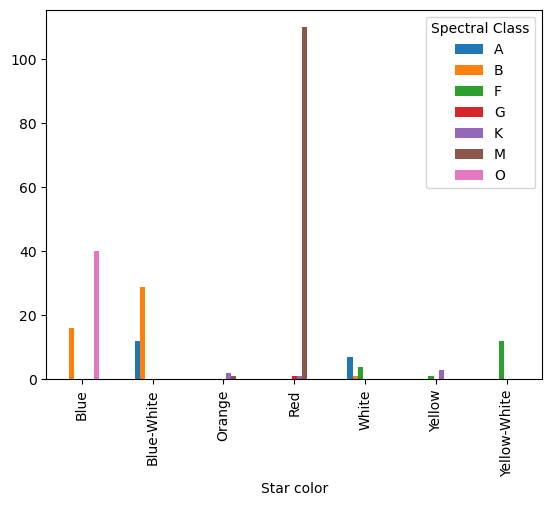

In [6]:
color_vs_spectral_class.plot(kind='bar')

De kleuren zijn erg verspreid over de categorieën, en vaak valt een kleur maar binnen één of twee categorieën. 

In [7]:
check_cat_vs_cat_correlation(data, 'Star color','Spectral Class')

The odds of a correlation between Star color and Spectral Class is 100.0% (Based on a p value of 2.4515296118459948e-130).
This percentage needs to be at least 95% for a significant correlation.


Zoals verwacht is er een sterke correlatie tussen de kleur en de classificatie (100%).

#### Star Color by Star Type
Omdat verschillende ster types verschillende kleuren kunnen hebben (red dwarf, red giant), verwacht ik minder correlatie dan bij de vorige vergelijking. 

In [8]:
color_vs_type = create_contingency_table(data, 'Star color', 'Star type')
color_vs_type

Star color,Blue,Blue-White,Orange,Red,White,Yellow,Yellow-White
Star type,,,,,,,
Brown Dwarf,0,0,0,40,0,0,0
Hyper Giant,7,6,2,23,2,0,0
Main Sequence,5,21,1,0,2,3,8
Red Dwarf,0,0,0,40,0,0,0
Super Giant,31,0,0,9,0,0,0
White Dwarf,13,14,0,0,8,1,4


<AxesSubplot:xlabel='Star type'>

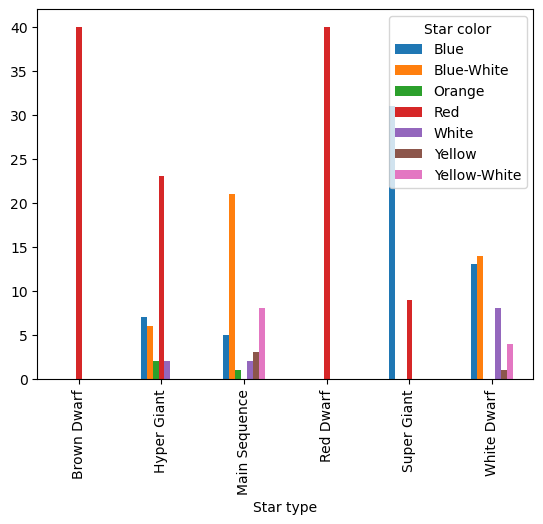

In [9]:
color_vs_type.plot(kind='bar')

In [10]:
check_cat_vs_cat_correlation(data, 'Star color','Star type')

The odds of a correlation between Star color and Star type is 100.0% (Based on a p value of 7.586916347034664e-45).
This percentage needs to be at least 95% for a significant correlation.


Hoewel ik had verwacht dat er minder correlatie zou zijn, geeft de chi squared test nog steeds aan dat er 100% kans is op een correlatie. Dit is niet helemaal onlogisch, aangezien de kleuren niet bij elk type voorkomen, en er ook grotere hoeveelheden van bepaalde kleuren zijn bij bepaalde types. De p-waarde is wel groter dan bij kleur en classificatie (e-45 vergeleken e-130)